### 행정구역 정보를 읽고 분석하기
* read_csv() 함수로 csv file 읽어오기
* 특정행과 열을 선택하기
* 컬럼명 변경
* 상관관계 분석(인구수와 면적간의 상관관계)
* 시각화

In [2]:
import pandas as pd

data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [3]:
data.sample(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
18,18,53497,가평,9,3,843.04,경기도,가평군
79,79,16009,영양,11,10,815.11,경상북도,영양군
217,217,87904,홍성,2,10,443.90,충청남도,홍성군


In [4]:
print(data.shape)
print(data.columns)
print(data.index)

(229, 8)
Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
RangeIndex(start=0, stop=229, step=1)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [6]:
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [7]:
print('인구수최대',data['인구수'].max())
print('인구수최소',data['인구수'].min())
print('인구수평균',data['인구수'].mean())
print('인구수표준편차',data['인구수'].std())




인구수최대 1125461
인구수최소 8392
인구수평균 211089.77729257641
인구수표준편차 207437.8370475227


In [8]:
#unique한 광역시도명

data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [9]:
#광역시도 값 row counting
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [10]:
##서울특별시
data.loc[data['광역시도'] == '서울특별시']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
124,124,526157,서울강남,6,7,39.50,서울특별시,강남구
125,125,432028,서울강동,8,5,24.60,서울특별시,강동구
126,126,310292,서울강북,5,2,23.60,서울특별시,강북구
127,127,554709,서울강서,4,4,41.40,서울특별시,강서구
128,128,484478,서울관악,5,6,29.60,서울특별시,관악구
129,129,342909,서울광진,7,6,17.05,서울특별시,광진구
130,130,401233,서울구로,4,7,20.11,서울특별시,구로구
131,131,222566,서울금천,5,7,13.01,서울특별시,금천구
132,132,547202,서울노원,6,1,35.44,서울특별시,노원구
133,133,331682,서울도봉,5,1,20.80,서울특별시,도봉구


In [11]:
seoul_data = data.loc[data['광역시도'] == '서울특별시']
print(seoul_data.sort_values(by='인구수',ascending=False).reset_index(drop=True))

print('서울특별시의 인구평균 = ',seoul_data['인구수'].mean())
print('서울특별시의 표준편차 = ',seoul_data['인구수'].std())

    Unnamed: 0     인구수 shortName  x  y     면적   광역시도  행정구역
0          141  615487      서울송파  8  6  33.90  서울특별시   송파구
1          127  554709      서울강서  4  4  41.40  서울특별시   강서구
2          132  547202      서울노원  6  1  35.44  서울특별시   노원구
3          124  526157      서울강남  6  7  39.50  서울특별시   강남구
4          128  484478      서울관악  5  6  29.60  서울특별시   관악구
5          145  464236      서울은평  4  3  29.70  서울특별시   은평구
6          142  453634      서울양천  4  5  17.40  서울특별시   양천구
7          140  434061      서울성북  6  2  24.57  서울특별시   성북구
8          125  432028      서울강동  8  5  24.60  서울특별시   강동구
9          138  407416      서울서초  6  6  47.04  서울특별시   서초구
10         130  401233      서울구로  4  7  20.11  서울특별시   구로구
11         148  391655      서울중랑  8  4  18.50  서울특별시   중랑구
12         135  383917      서울동작  5  5  16.36  서울특별시   동작구
13         136  364232      서울마포  5  4  23.87  서울특별시   마포구
14         143  351837     서울영등포  4  6  24.56  서울특별시  영등포구
15         129  342909      서울광진  7  6  17.05  서울특별시   광

In [12]:
kk_data = data.loc[data['광역시도'] == '경기도',['인구수']]
print(f'경기도의 평균 인구수 = {kk_data.mean()} 명')
print(f'경기도의 인구 표준편차 = {kk_data.std()}')

경기도의 평균 인구수 = 인구수    378845.483871
dtype: float64 명
경기도의 인구 표준편차 = 인구수    304548.395142
dtype: float64


In [20]:
data.loc[data['광역시도'] == '경상북도',['인구수','면적','행정구역']].sort_values(by='인구수',ascending=False).reset_index(drop=True)

,인구수,면적,행정구역
0,488395,1127.00,포항시
1,396685,616.10,구미시
2,251220,411.58,경산시
3,242618,1323.85,경주시
4,157317,1519.00,안동시
5,127941,1009.56,김천시
6,112446,451.00,칠곡군
7,101612,668.45,영주시
8,93305,1254.82,상주시
9,91214,919.76,영천시


In [30]:
print(data['인구수'].mean())

data.loc[data['인구수'].mean()> data['인구수']].head()

211089.77729257641


,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [24]:
#iloc 사용하기
data.loc[20:25,'인구수':'광역시도']
data.iloc[20:26,1:5]

,인구수,shortName,x,y
20,63227,과천,7,7
21,327111,광명,3,3
22,290210,광주,8,7
23,175676,구리,9,4
24,273302,군포,5,8
25,326523,김포,2,3


In [40]:
#칼럼명 변경
data = data.rename(columns={'Unnamed: 0':'seq'})
data

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [33]:
#seq 컬럼을 index로 변경하기
data.set_index('seq')

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


# 광역시도별로 인구수가 가장 많은 행정구역은?
- unique(),value_counts(),max() 함수사용
- 사용자 정의 함수 선언하기

In [225]:
#경기도에서 인구수가 가장 많은 행정구역은?
pop_max_value = data.loc[data['광역시도'] == '경기도','인구수'].max()








In [226]:
#광역시도가 경기도인 조건1, 인구수가 pop_max_value와 같은 조건2

data.loc[(data['광역시도'] == '경기도')&(data['인구수'] == pop_max_value)]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [227]:
#sido_name (광역시도)을 argument로 받아서, 특정 광역시도중에서 가장 인구가 많은 행정구역을 반환하는 함수 정의하기
def get_pop_max_city(sido_name):
    pop_max_value = data.loc[data['광역시도'] == sido_name,'인구수'].max()
    return data.loc[(data['광역시도'] == sido_name)&(data['인구수'] == pop_max_value),['광역시도','행정구역','인구수','면적']]


In [228]:
get_pop_max_city('서울특별시')

,광역시도,행정구역,인구수,면적
141,서울특별시,송파구,615487,33.9


In [205]:
pop_max_city_df = pd.DataFrame(columns=['광역시도','행정구역','인구수','면적'])
for sido_name in data['광역시도'].unique():



pop_max_city_df


강원도
경기도
경상남도
경상북도
광주광역시
대구광역시
대전광역시
부산광역시
서울특별시
세종특별자치시
울산광역시
인천광역시
전라남도
전라북도
제주특별자치도
충청남도
충청북도


,광역시도,행정구역,인구수,면적


# 광역시도별로 인구수가 가장 많고, 면적이 가장 넓은 행정구역은?
- 1단계 : 광역시도별 면적이 가장 넓은 행정구역은?
- 2단계 : 광역시도별 인구수가 가장 많고, 면적이 가장 넓은 행정구역은?
- unique(),value(),counts(),max() 함수사용

# misson2 광역시도별로 인구수와 면적간의 상관계수 구하기
- 광역시도 | 상관계쑤

In [12]:
import numpy as np
import pandas as pd
pop_max_place = pd.DataFrame(columns=['광역시도','행정구역','인구수','면젹'])

def max_calc(city_name):
    city = data.loc[data['광역시도'] == city_name]
    max_people = city['인구수'].max()
    max_area = city['면적'].max()

    result = city.loc[(city['인구수'] == max_people) | (city['면적'] == max_area)]
    return result

for location in data['광역시도'].unique():
    pop_max_place = pop_max_place.append(max_calc(location))

print(pop_max_place)



        광역시도  행정구역      인구수   면젹  Unnamed: 0 shortName     x     y       면적
8        강원도   원주시   313851  NaN         8.0        원주  10.0   7.0   867.30
15       강원도   홍천군    62957  NaN        15.0        홍천  10.0   4.0  1817.94
30       경기도   수원시  1125461  NaN        30.0        수원   6.0   9.0   121.09
36       경기도   양평군    95614  NaN        36.0        양평   9.0   6.0   877.08
61      경상남도   창원시  1010040  NaN        61.0        창원   7.0  18.0   734.87
66      경상남도   합천군    42515  NaN        66.0        합천   7.0  14.0   983.42
77      경상북도   안동시   157317  NaN        77.0        안동  10.0  10.0  1519.00
89      경상북도   포항시   488395  NaN        89.0        포항  12.0  11.0  1127.00
90     광주광역시   광산구   389386  NaN        90.0      광주광산   2.0  19.0   222.88
93     광주광역시    북구   439683  NaN        93.0      광주북구   3.0  19.0   121.74
96     대구광역시   달서구   584517  NaN        96.0      대구달서   8.0  15.0    62.30
97     대구광역시   달성군   178203  NaN        97.0      대구달성   9.0  15.0   427.03
105    대전광역시

In [194]:
data.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [63]:
## 데이터 프레임의 인덱스를 1부터 시작하는 방법
print(len(pop_max_city_df))
pop_max_city_df.index

17


RangeIndex(start=0, stop=17, step=1)

In [65]:
import numpy as np
np.arange(1,len(pop_max_city_df)+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [66]:
pop_max_city_df.index = np.arange(1,len(pop_max_city_df)+1)

pop_max_city_df

,광역시도,행정구역,인구수
1,강원도,원주시,313851
2,경기도,수원시,1125461
3,경상남도,창원시,1010040
4,경상북도,포항시,488395
5,광주광역시,북구,439683
6,대구광역시,달서구,584517
7,대전광역시,서구,475094
8,부산광역시,해운대구,397134
9,서울특별시,송파구,615487
10,세종특별자치시,세종시,191233


# 상관계수(correlation)
- 인구수와 면적간에 관련성이 있는지 살펴보기위해

In [ ]:
# 전체행정구역의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

In [70]:
# 전체행정구역의 면적과 인구수의 상관계수 구하기
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df['면적'].corr(seoul_df['인구수'])

0.664426818890978

## Group By 기능
- 광역시도별 인구수의 합
- ~별에 해당하는 칼럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다.
- Series 객체 groupby() 함수는 컬럼의 값을 인자로 전달한다.
- DataFrame 객체의 groupby() 함수는 칼럼명을 인자로 전달한다

In [71]:
print(type(data['광역시도']))

<class 'pandas.core.series.Series'>


In [77]:
print(type(data.loc[0:1]))

<class 'pandas.core.frame.DataFrame'>


In [88]:
# series 객체 사용 - 광역시도별 인구수의 합계
# Series 객체 groupby() 함수는 컬럼의 값을 인자로 전달한다.
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)


광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [90]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계
# DataFrame 객체의 groupby() 함수는 칼럼명을 인자로 전달한다
data.groupby('광역시도').sum()


,Unnamed: 0,인구수,x,y,면적
광역시도,,,,,
강원도,153,1429438,173,68,16874.810
경기도,1023,11744210,182,162,10179.743
경상남도,1035,3144487,123,313,10437.460
경상북도,1794,2508964,229,240,19021.850
광주광역시,460,1438209,12,99,501.280
대구광역시,788,2378450,74,111,885.690
대전광역시,525,1467677,23,66,539.640
부산광역시,1848,3323591,162,276,763.240
서울특별시,3400,9394807,142,111,605.390


In [91]:
data.groupby('광역시도')['인구수'].sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [98]:
#광역시도별, 행정구역별 인구수의 합계
import openpyxl
groupby_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()
groupby_df.to_excel('data/광역시도별행정구역별인구수의합계.xlsx')

## 엑셀 수치 데이터에 콤파(,) 찍기

In [100]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
groupby_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## 광역시도별 인구수의 max,mean,std 집계함수를 한꺼번에 조회하기
- DataFrame의 agg()함수 사용하기


In [104]:
data.loc[data['광역시도'] == '세종특별자치시']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
149,149,191233,세종,4,11,465.23,세종특별자치시,세종시


In [139]:
## 여러가지 함수를 agg를 통해서 groupby된 dataframe에 적용하기
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0).sort_values(by='std',ascending=False).round(2)
group_agg_df.head(3)

,max,mean,std
광역시도,,,
경기도,1125461,378845.48,304548.40
경상남도,1010040,174693.72,245796.47
충청북도,790216,134974.55,223460.36


In [136]:
#광역시도를 index에서 column으로 옮기기
group_agg_df.reset_index().head(3) ##group_agg_df.reset_index(level = '광역시도',inplace=False)


,index,광역시도,max,mean,std
0,0,경기도,1125461,378845.48,304548.40
1,1,경상남도,1010040,174693.72,245796.47
2,2,충청북도,790216,134974.55,223460.36
3,3,제주특별자치도,430504,287936.50,201620.89
4,4,인천광역시,527153,276657.50,199353.60
5,5,대구광역시,584517,297306.25,174375.39
6,6,전라북도,630708,124217.71,168327.13
7,7,충청남도,584912,129741.93,141125.11
8,8,광주광역시,439683,287641.80,137076.68
9,9,서울특별시,615487,375792.28,125231.25


In [135]:
#inplace속성의 default = False
#변경된 결과를 화면에 출력만 하고 원본 DataFrame을 수정하지는 않음
# inplace = True 이면 변경된 결과를 화면에 출력하지 않고, 원본 DataFrame을 수정한다.
group_agg_df.reset_index(inplace=True)


In [138]:
group_agg_df.head(3)

,광역시도,max,mean,std
0,경기도,1125461,378845.48,304548.40
1,경상남도,1010040,174693.72,245796.47
2,충청북도,790216,134974.55,223460.36


In [141]:
#행과 열을 바꾸고 싶다면 T 속성(property) 이나 transpose() 함수 사용
group_agg_df.T #행 과 열을 바꿔준다

광역시도,경기도,경상남도,충청북도,제주특별자치도,인천광역시,대구광역시,전라북도,충청남도,광주광역시,서울특별시,경상북도,대전광역시,부산광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461.00,1010040.00,790216.00,430504.00,527153.0,584517.00,630708.00,584912.00,439683.00,615487.00,488395.00,475094.00,397134.00,313851.00,263166.00,327270.00,191233.0
mean,378845.48,174693.72,134974.55,287936.50,276657.5,297306.25,124217.71,129741.93,287641.80,375792.28,109085.39,293535.40,207724.44,79413.22,77298.32,221117.00,191233.0
std,304548.40,245796.47,223460.36,201620.89,199353.6,174375.39,168327.13,141125.11,137076.68,125231.25,124954.74,111853.57,106246.04,87316.38,74413.25,64163.29,0.0


In [142]:
group_agg_df.transpose()

광역시도,경기도,경상남도,충청북도,제주특별자치도,인천광역시,대구광역시,전라북도,충청남도,광주광역시,서울특별시,경상북도,대전광역시,부산광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461.00,1010040.00,790216.00,430504.00,527153.0,584517.00,630708.00,584912.00,439683.00,615487.00,488395.00,475094.00,397134.00,313851.00,263166.00,327270.00,191233.0
mean,378845.48,174693.72,134974.55,287936.50,276657.5,297306.25,124217.71,129741.93,287641.80,375792.28,109085.39,293535.40,207724.44,79413.22,77298.32,221117.00,191233.0
std,304548.40,245796.47,223460.36,201620.89,199353.6,174375.39,168327.13,141125.11,137076.68,125231.25,124954.74,111853.57,106246.04,87316.38,74413.25,64163.29,0.0


## 시각화
* plot이 출력되려면 show() 함수를 호출해야하지만 jupyter 에서는 show() 함수를 호출하지 않아도 된다.
* %matplotlib inline 설정을 해주어야 한다.
* 한글폰트 설정이 필요하다.
* plot에 대한 설정은 matplotlib의 함수들을 사용하고,

In [144]:
%matplotlib inline

In [146]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
print('matplotlib',matplotlib.__version__)
print('seaborn',sns.__version__)

matplotlib 3.5.0
seaborn 0.11.2


In [147]:
## 폰트이름과 폰트파일 정보 출력 : list comprehension
## mac은 AppleGothic 사용!
[(font.name,font.fname) for font in fm.fontManager.ttflist if 'Ap' in font.name]

[('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf'),
 ('Apple Symbols', '/System/Library/Fonts/Apple Symbols.ttf'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf'),
 ('AppleGothic', '/System/Library/Fonts/Supplemental/AppleGothic.ttf'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf'),
 ('Apple Braille', '/System/Library/Fonts/Apple Braille.ttf'),
 ('AppleMyungjo', '/System/Library/Fonts/Supplemental/AppleMyungjo.ttf'),
 ('Apple Chancery', '/System/Library/Fonts/Supplemental/Apple Chancery.ttf')]

In [148]:
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

AppleGothic


In [149]:
#matplotlib의 rc(run command) 함수를 사용해서 폰트이름 설정
matplotlib.rc('font',family = font_prop)

### Figure,Axes
* Figure은 Plot이 그려지는 도화지
* Axes는 Plot의 그려지는 공간
* Figure에 Axes를 여러개 생성해서 Figure를 분할해서 plot을 그릴수 있음
* seaborn()에서 제공하는 막대그래프를 그릴 수 있는 barplot()함수 사용

In [151]:
seoul_df.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
124,124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,126,310292,서울강북,5,2,23.6,서울특별시,강북구
127,127,554709,서울강서,4,4,41.4,서울특별시,강서구
128,128,484478,서울관악,5,6,29.6,서울특별시,관악구


AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


<AxesSubplot:xlabel='행정구역', ylabel='면적'>

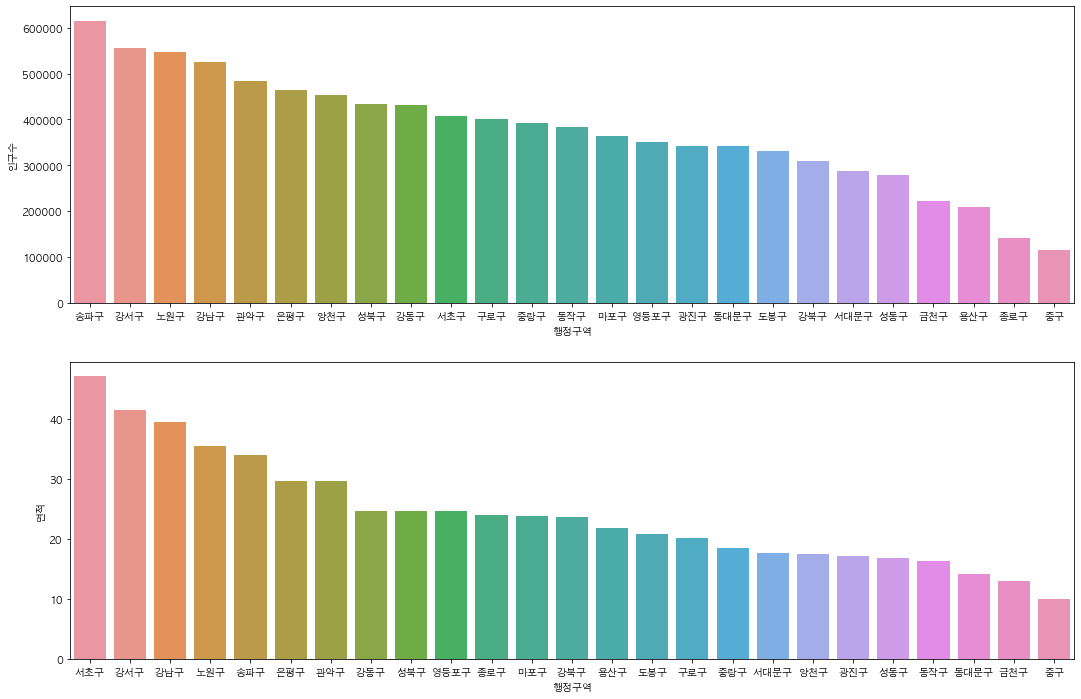

In [161]:
figure,(axes1,axes2) = plt.subplots(nrows=2,ncols=1) #2행 1열 AxesSubplot객체가 두개생김
figure.set_size_inches(18,12) #도화지 사이즛 설정
print(axes1)
print(axes2)
sns.barplot(x = '행정구역', y = '인구수',data = seoul_df.sort_values(by='인구수',ascending=False), ax = axes1)
sns.barplot(x = '행정구역', y = '면적',data = seoul_df.sort_values(by='면적',ascending=False), ax = axes2)

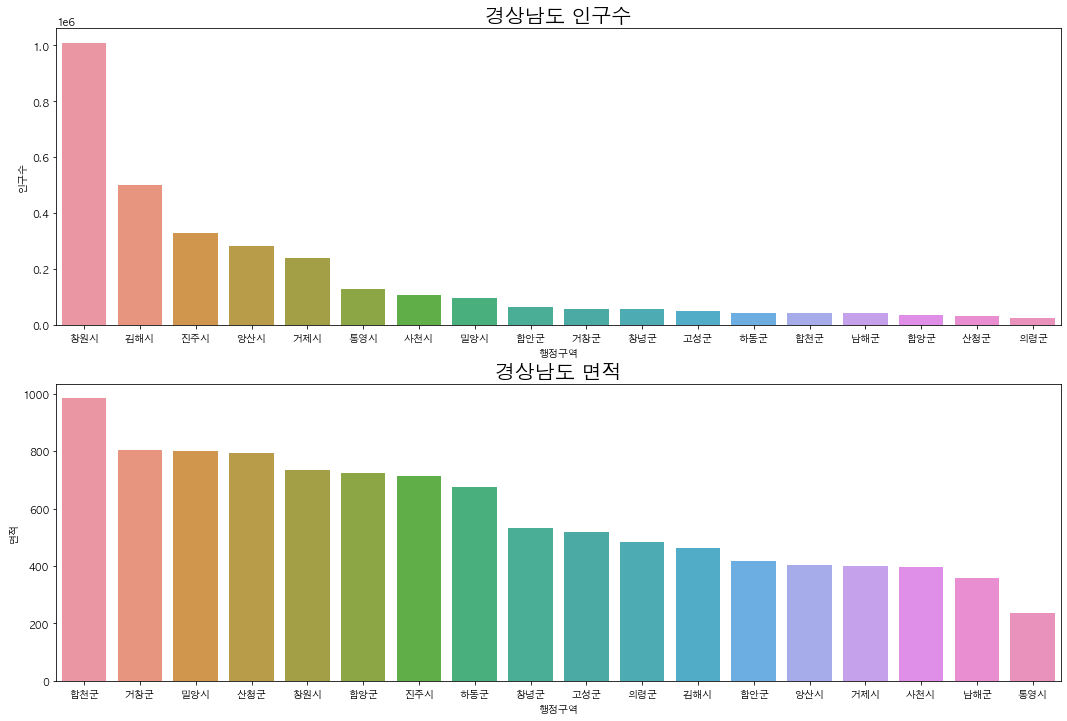

In [169]:
#광역시도 이름을 인자로 받아서 인구수와 면적을 보여주는 barplot을 그리는 함수
# figure,(axes1,axes2) = plt.subplots(nrows=2,ncols=1) #2행 1열 AxesSubplot객체가 두개생김
# figure.set_size_inches(18,12) #도화지 사이즛 설정
# print(axes1)
# print(axes2)
# sns.barplot(x = '행정구역', y = '인구수',data = seoul_df.sort_values(by='인구수',ascending=False), ax = axes1)
# sns.barplot(x = '행정구역', y = '면적',data = seoul_df.sort_values(by='면적',ascending=False), ax = axes2)
# seoul_df = data.loc[data['광역시도'] == '서울특별시']

def make_city_plot(sido_name):
    figure,(axes1,axes2) = plt.subplots(nrows=2,ncols=1)
    figure.set_size_inches(18,12)
    sido_df = data.loc[data['광역시도'] == sido_name]
    pop_plot = sns.barplot(x = '행정구역', y = '인구수',data = sido_df.sort_values(by = '인구수',ascending=False),ax = axes1)
    area_plot = sns.barplot(x = '행정구역', y = '면적', data = sido_df.sort_values(by='면적',ascending=False),ax = axes2)
    pop_plot.set_title(f'{sido_name} 인구수',fontsize =20)
    area_plot.set_title(f'{sido_name} 면적',fontsize = 20)

make_city_plot('경상남도')

<AxesSubplot:xlabel='광역시도', ylabel='인구수'>

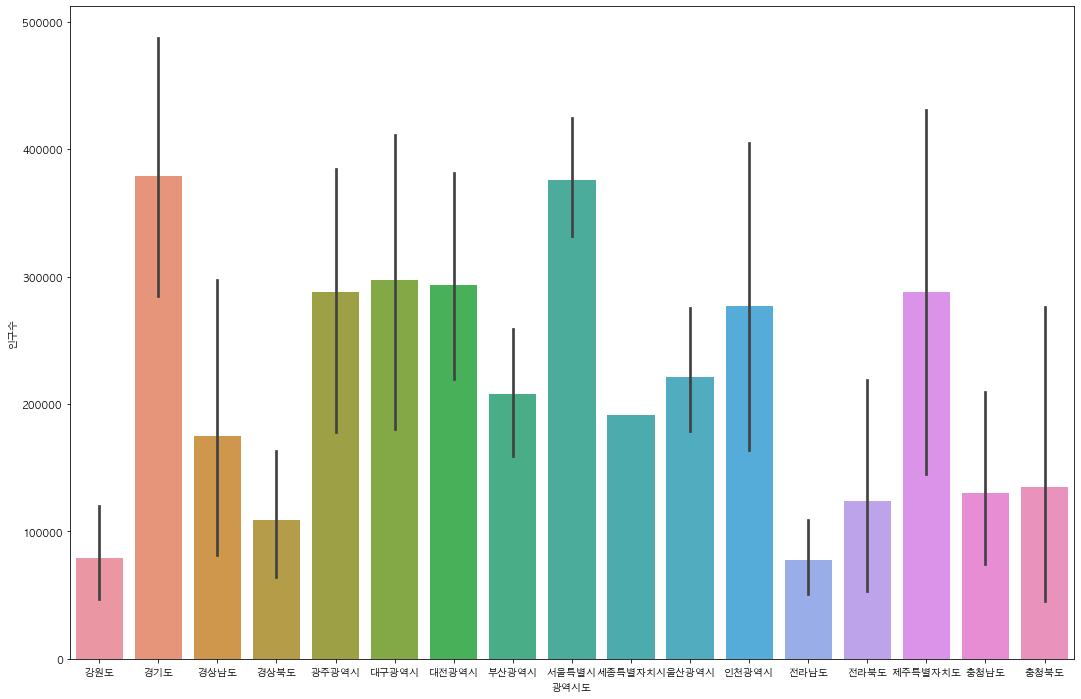

In [170]:
figure, axes1 = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,12)
sns.barplot(x = '광역시도', y = '인구수', data = data,ax = axes1)

In [171]:
def my_format(value):
    return f'{value:,}'

In [173]:
my_format(1000)

'1,000'

In [174]:
for i,v in enumerate(seoul_df["인구수"].iteritems()):
    print(i,v)

0 (124, 526157)
1 (125, 432028)
2 (126, 310292)
3 (127, 554709)
4 (128, 484478)
5 (129, 342909)
6 (130, 401233)
7 (131, 222566)
8 (132, 547202)
9 (133, 331682)
10 (134, 342429)
11 (135, 383917)
12 (136, 364232)
13 (137, 288543)
14 (138, 407416)
15 (139, 279939)
16 (140, 434061)
17 (141, 615487)
18 (142, 453634)
19 (143, 351837)
20 (144, 208603)
21 (145, 464236)
22 (146, 140595)
23 (147, 114967)
24 (148, 391655)
